In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import h5py
import matplotlib.pyplot as plt
from geobipy import hdfRead
from geobipy import Waveform
from geobipy import SquareLoop, CircularLoop
from geobipy import butterworth
from geobipy import TdemSystem
from geobipy import TdemData
from geobipy import TdemDataPoint
from geobipy import Model1D
from geobipy import StatArray
from geobipy import Distribution

[2 3 5 4]
[2 3 5 4]


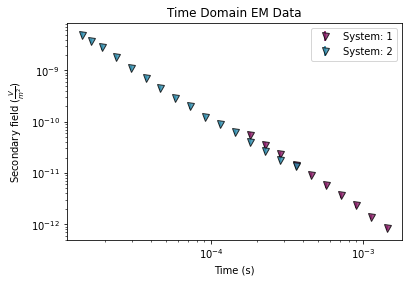

In [10]:
dataFolder = "..//supplementary//Data//"

# The data file name
dataFile=[dataFolder + 'Skytem_High.txt', dataFolder + 'Skytem_Low.txt']
# The EM system file name
systemFile=[dataFolder + 'SkytemHM-SLV.stm', dataFolder + 'SkytemLM-SLV.stm']

################################################################################
# Initialize and read an EM data set
D = TdemData()
D.read(dataFile, systemFile)

################################################################################
# Get a datapoint from the dataset
tdp = D.datapoint(0)

plt.figure()
tdp.plot();

In [ ]:
D.

In [15]:
!head -n 2 '../supplementary/data/Skytem_High.txt'

In [9]:
tdp.__dict__

{'_system': [<geobipy.src.classes.system.TdemSystem_GAAEM.TdemSystem_GAAEM at 0x13ad11190>,
 '_x': StatArray([431112.2]),
 '_y': StatArray([4194346.5]),
 '_z': StatArray([2304.]),
 '_components_per_channel': ['z'],
 '_channels_per_system': array([34, 26]),
 '_elevation': StatArray([0.]),
 '_units': '$\\frac{V}{m^{2}}$',
 '_secondary_field': StatArray([       nan,        nan,        nan,        nan,        nan,
                   nan,        nan,        nan,        nan,        nan,
                   nan,        nan,        nan,        nan,        nan,
                   nan,        nan, 5.5959e-11, 3.5732e-11, 2.3111e-11,
            1.4331e-11, 9.0570e-12, 5.7224e-12, 3.6334e-12, 2.3387e-12,
            1.3843e-12, 8.5261e-13,        nan,        nan,        nan,
                   nan,        nan,        nan,        nan,        nan,
                   nan,        nan,        nan,        nan, 4.9966e-09,
            3.7827e-09, 2.8105e-09, 1.8249e-09, 1.1185e-09, 7.1179e-10,
          

[2 3 5 4] [0 1]
[2 3 5 4] [0 1]
[-3.59938625e-14 -0.00000000e+00 -3.83541453e-14 -0.00000000e+00
 -4.41500201e-14 -0.00000000e+00 -3.97036886e-14 -4.34620904e-14
 -4.00667721e-14 -4.17911427e-14 -4.17582979e-14 -3.57115697e-14
 -3.36893162e-16  5.65135822e-17  1.83568712e-17  6.47585700e-18
  1.16777555e-18  1.93277241e-18 -7.95053747e-19  1.73839571e-18
  1.28923852e-18  1.47569627e-18  1.93332710e-18  1.66387207e-18
  1.56901680e-18  1.24027521e-18  1.10901133e-18  7.49712655e-19
  5.81587904e-19  3.89509068e-19  2.67468151e-19  1.91535365e-19
  1.31856602e-19  1.37064539e-19]
[-4.13462351e-13 -2.69914102e-15 -2.89396367e-16 -1.26495453e-16
 -5.59394556e-17 -1.30263598e-17  1.31883115e-17  3.16820484e-17
  4.35980963e-17  4.40805153e-17  3.78112729e-17  2.89431533e-17
  1.97387513e-17  1.17923529e-17  5.82902482e-18  1.94127831e-18
 -7.00017972e-20 -8.08248362e-19 -7.38576421e-19 -2.96758854e-19
  2.15011744e-19  6.16481651e-19  7.92838129e-19  6.38657859e-19
 -2.70544763e-19  2.2925

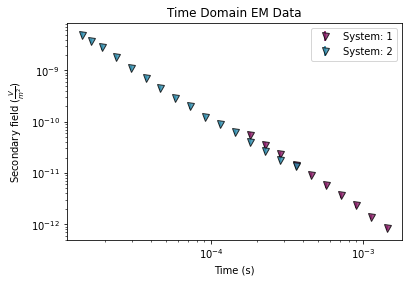

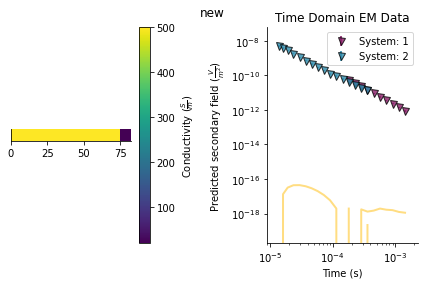

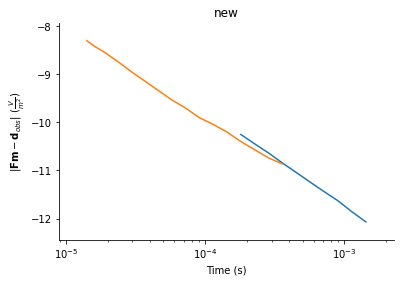

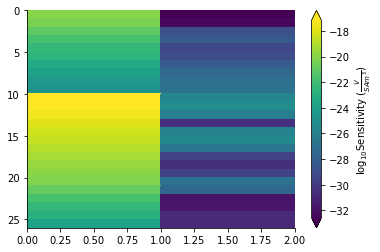

In [2]:


################################################################################
# Using a time domain datapoint
# +++++++++++++++++++++++++++++

################################################################################
# We can define a 1D layered earth model, and use it to predict some data
par = StatArray(np.r_[500.0, 20.0], "Conductivity", "$\frac{S}{m}$")
mod = Model1D(edges=np.r_[0, 75.0, np.inf], parameters=par)

################################################################################
# Forward model the data
tdp.forward(mod)

################################################################################
plt.figure()
plt.subplot(121)
_ = mod.pcolor()
plt.subplot(122)
_ = tdp.plot()
_ = tdp.plotPredicted()
plt.tight_layout()
plt.suptitle('new')

################################################################################
plt.figure()
tdp.plotDataResidual(xscale='log', log=10)
plt.title('new')

################################################################################
# Compute the sensitivity matrix for a given model
J = tdp.sensitivity(mod)
plt.figure()
_ = np.abs(J).pcolor(equalize=True, log=10, flipY=True)

################################################################################
# Attaching statistical descriptors to the datapoint
# ++++++++++++++++++++++++++++++++++++++++++++++++++
#
# Define a multivariate log normal distribution as the prior on the predicted data.
tdp.predictedData.setPrior('MvLogNormal', tdp.data[tdp.active], tdp.std[tdp.active]**2.0)

################################################################################
# This allows us to evaluate the likelihood of the predicted data
print(tdp.likelihood(log=True))
# Or the misfit
print(tdp.dataMisfit())